This cell imports essential libraries for data manipulation (pandas), numerical operations (numpy), and data visualization (matplotlib and seaborn).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This cell configures pandas to display all columns of a DataFrame. This is useful for inspecting dataframes, especially those with many columns, without truncation.

In [2]:
pd.set_option('display.max_columns',None)

This cell loads the training dataset from 'train.csv' into a pandas DataFrame named `train_set`. It also drops the 'id' column, as it's typically a unique identifier and not a feature relevant for model training. Finally, it displays the first few rows of the DataFrame.

In [3]:
train_set = pd.read_csv('train.csv').drop('id',axis = 1)
train_set

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.300
1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.700
2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.000
3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.900
4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.000
...,...,...,...,...,...,...,...,...,...,...,...,...
629995,18,female,b.tech,4.86,70.7,yes,4.1,good,mixed,high,moderate,69.500
629996,21,female,ba,7.08,54.4,yes,4.5,average,mixed,low,moderate,78.900
629997,24,male,bca,0.64,44.2,yes,4.3,poor,online videos,low,moderate,19.599
629998,20,male,b.com,1.54,75.1,yes,8.2,average,group study,high,moderate,59.100


This cell separates the features (`X_train_set`) from the target variable (`y_train_set`) in the `train_set` DataFrame. 'exam_score' is identified as the target variable that the model will predict.

In [4]:
X_train_set, y_train_set = train_set.drop(['exam_score'],axis = 1), train_set['exam_score']

Given the large dataset size (~630k samples), a test size of 1% is used.
This provides a sufficiently large and representative test set while
maximizing the amount of data available for training.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_set,y_train_set,random_state = 42,test_size = 0.01)

In [6]:
X_train.describe()

,age,study_hours,class_attendance,sleep_hours
count,623700.000000,623700.000000,623700.000000,623700.000000
mean,20.545833,4.002068,71.989505,7.072463
std,2.260333,2.359971,17.430620,1.744767
min,17.000000,0.080000,40.600000,4.100000
25%,19.000000,1.970000,57.000000,5.600000
50%,21.000000,4.000000,72.600000,7.100000
75%,23.000000,6.050000,87.200000,8.600000
max,24.000000,7.910000,99.400000,9.900000


In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 623700 entries, 501630 to 121958
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   age               623700 non-null  int64  
 1   gender            623700 non-null  object 
 2   course            623700 non-null  object 
 3   study_hours       623700 non-null  float64
 4   class_attendance  623700 non-null  float64
 5   internet_access   623700 non-null  object 
 6   sleep_hours       623700 non-null  float64
 7   sleep_quality     623700 non-null  object 
 8   study_method      623700 non-null  object 
 9   facility_rating   623700 non-null  object 
 10  exam_difficulty   623700 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 57.1+ MB


This cell calculates and displays the frequency count of unique values in the 'gender' column of `X_train`. This is an important step in exploratory data analysis for categorical features to understand their distribution and identify any imbalances.

In [8]:
X_train['gender'].value_counts()

,count
gender,
other,209029
male,208472
female,206199


This cell calculates and displays the frequency count of unique values in the 'course' column of `X_train`. This helps in understanding the distribution of students across different courses and can highlight popular or less common courses.

In [9]:
X_train['course'].value_counts()

,count
course,
b.tech,129884
b.sc,110471
b.com,109850
bca,87895
bba,74847
ba,61372
diploma,49381


This cell calculates and displays the frequency count of unique values in the 'internet_access' column of `X_train`. This provides insight into how many students have or do not have internet access, which could be a significant factor in their academic performance.

In [10]:
X_train['internet_access'].value_counts()

,count
internet_access,
yes,573656
no,50044


In [11]:
X_train['sleep_quality'].value_counts()

,count
sleep_quality,
poor,211532
good,210952
average,201216


In [12]:
X_train['study_method'].value_counts()

,count
study_method,
coaching,130376
self-study,129789
mixed,121828
group study,121810
online videos,119897


In [13]:
X_train['facility_rating'].value_counts()

,count
facility_rating,
medium,211909
low,210225
high,201566


In [14]:
X_train['exam_difficulty'].value_counts()

,count
exam_difficulty,
moderate,350435
easy,174757
hard,98508


*   **Ordinal Categorical Features**: These features have categories with a meaningful order or ranking, but the intervals between categories are not necessarily uniform or quantifiable. An example provided from the dataset is 'exam\_difficulty'.
*   **Nominal Categorical Features**: These features have categories that do not have an intrinsic order or ranking. An example provided from the dataset is 'gender'.

In [15]:
ordinal_categorical_features = ['exam_difficulty','facility_rating','sleep_quality']
nominal_categorical_features = ['study_method','course','gender']

This cell generates a histogram to visualize the distribution of ages within the `X_train` dataset. It helps to understand the age demographic of the students.

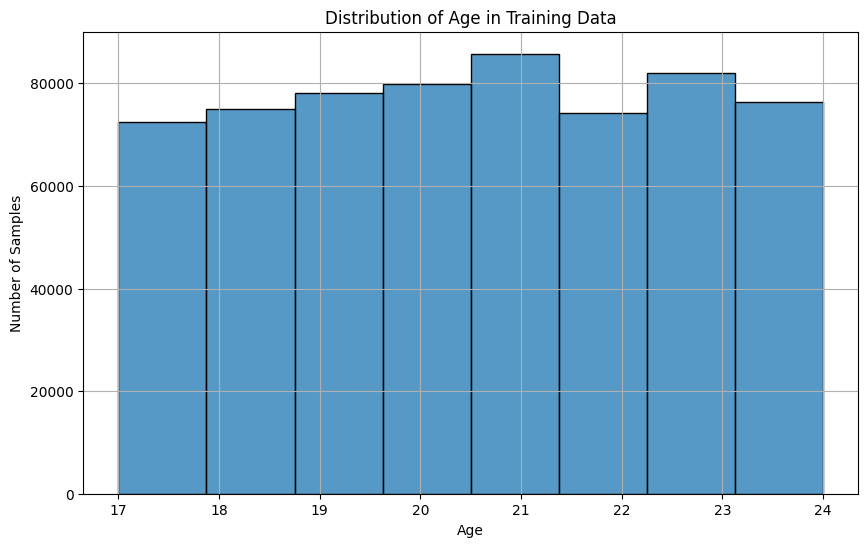

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(x=X_train['age'], bins=len(X_train['age'].unique()))
plt.title('Distribution of Age in Training Data')
plt.xlabel('Age')
plt.ylabel('Number of Samples')
plt.grid(True)
plt.show()

This cell generates a histogram with a Kernel Density Estimate (KDE) to visualize the distribution of 'study_hours' in the training data. It helps in understanding the common study hour ranges among students.

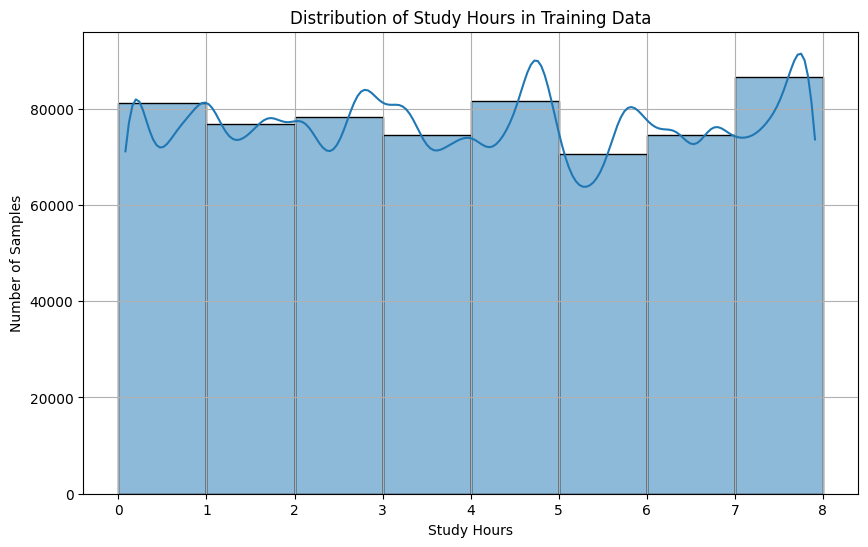

In [17]:
plt.figure(figsize=(10, 6))
bins = np.arange(0, X_train['study_hours'].max() + 1, 1) # Create bins for each integer study hour
sns.histplot(x=X_train['study_hours'], bins=bins, kde=True)
plt.title('Distribution of Study Hours in Training Data')
plt.xlabel('Study Hours')
plt.ylabel('Number of Samples')
plt.grid(True)
plt.xticks(bins)
plt.show()

This cell creates a box plot to visualize the distribution of 'exam_score' based on whether students have 'internet_access' or not. This helps in understanding the potential impact of internet access on exam performance.

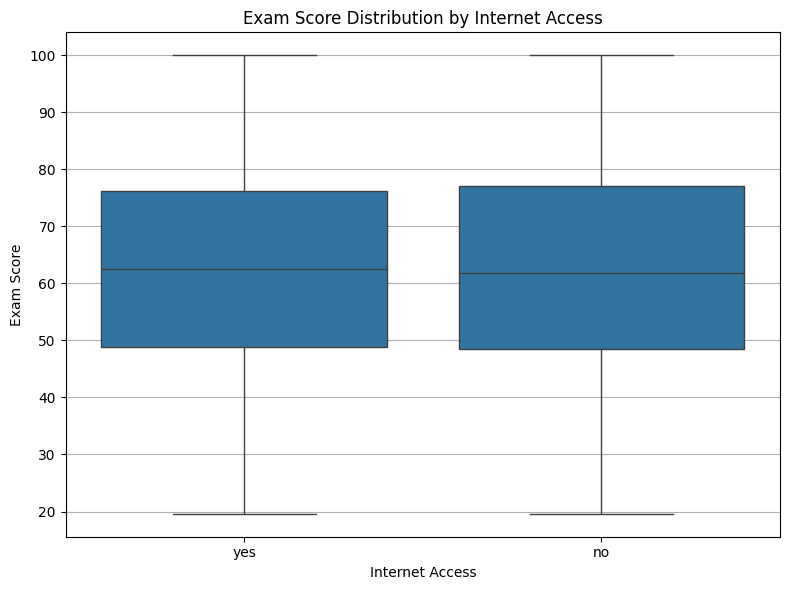

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=X_train['internet_access'], y=y_train)
plt.title('Exam Score Distribution by Internet Access')
plt.xlabel('Internet Access')
plt.ylabel('Exam Score')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

This cell generates a regression plot to show the relationship between 'age' and 'exam_score'. The scatter plot points are made semi-transparent (`alpha=0.3`), and a red regression line is added to indicate the trend.

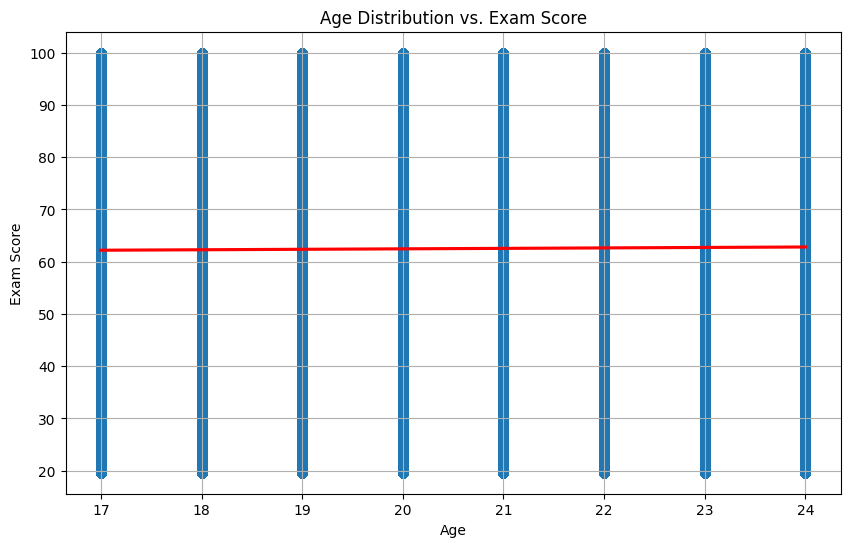

In [19]:
plt.figure(figsize=(10, 6))
sns.regplot(x=X_train['age'], y=y_train, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Age Distribution vs. Exam Score')
plt.xlabel('Age')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

This cell creates a box plot to visualize the distribution of 'exam_score' across different 'course' types. This helps in understanding how exam performance varies by academic program.

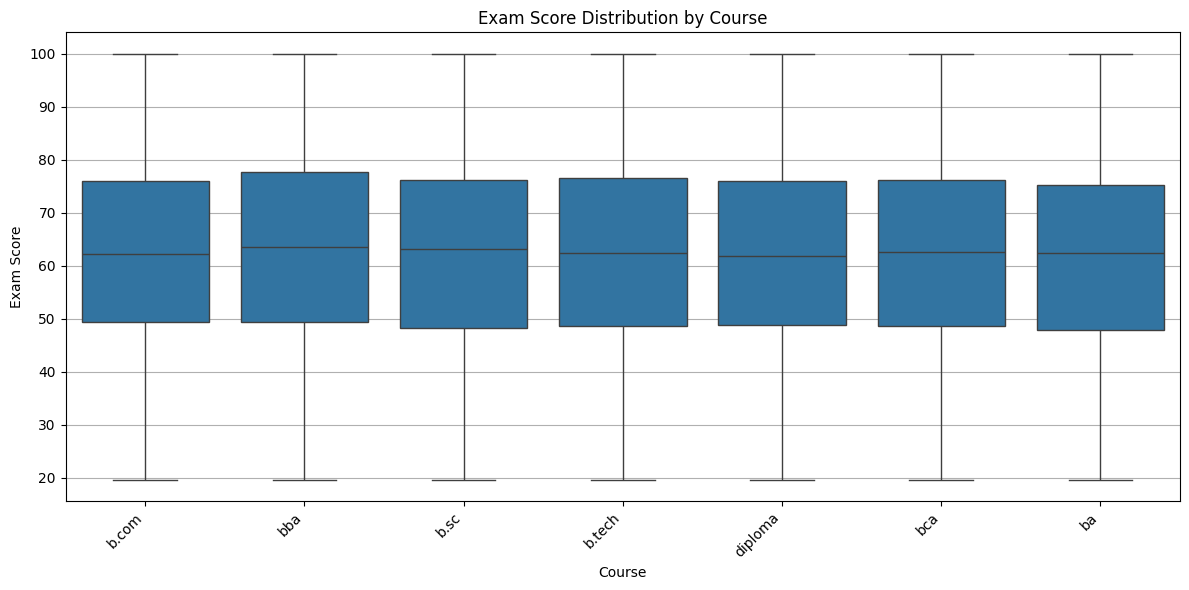

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=X_train['course'], y=y_train)
plt.title('Exam Score Distribution by Course')
plt.xlabel('Course')
plt.ylabel('Exam Score')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

This cell generates a regression plot to visualize the relationship between 'study_hours' and 'exam_score'. It includes a scatter plot with semi-transparent points and a green regression line to highlight the trend.

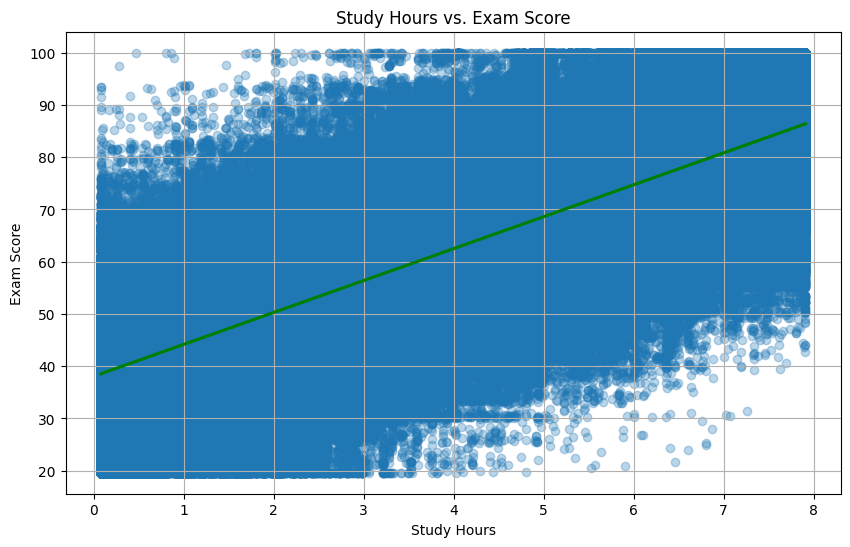

In [21]:
plt.figure(figsize=(10, 6))
sns.regplot(x=X_train['study_hours'], y=y_train, scatter_kws={'alpha':0.3}, line_kws={'color':'green'})
plt.title('Study Hours vs. Exam Score')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

This cell generates a regression plot to visualize the relationship between 'class_attendance' and 'exam_score'. It includes a scatter plot with semi-transparent points and a blue regression line to indicate the trend.

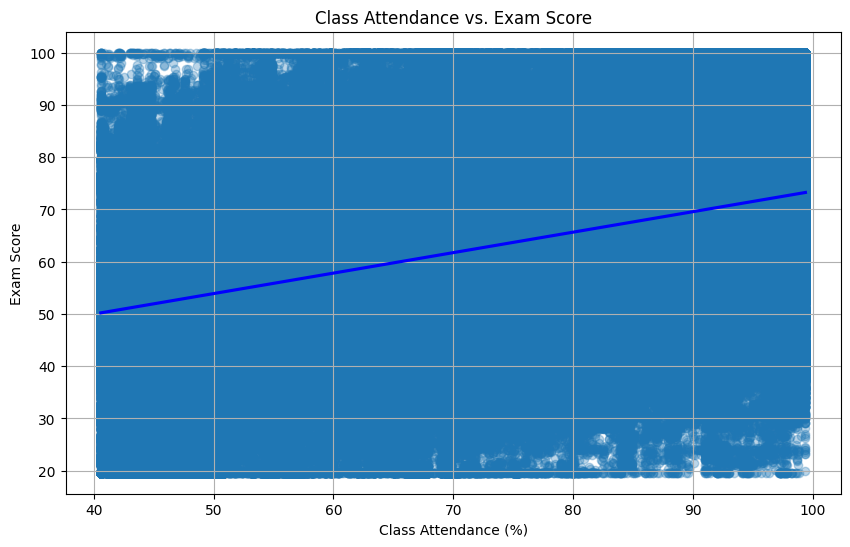

In [22]:
plt.figure(figsize=(10, 6))
sns.regplot(x=X_train['class_attendance'], y=y_train, scatter_kws={'alpha':0.3}, line_kws={'color':'blue'})
plt.title('Class Attendance vs. Exam Score')
plt.xlabel('Class Attendance (%)')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

This cell creates a box plot to visualize the distribution of 'exam_score' across different 'facility_rating' levels. This helps in understanding the potential impact of facility quality on exam performance.

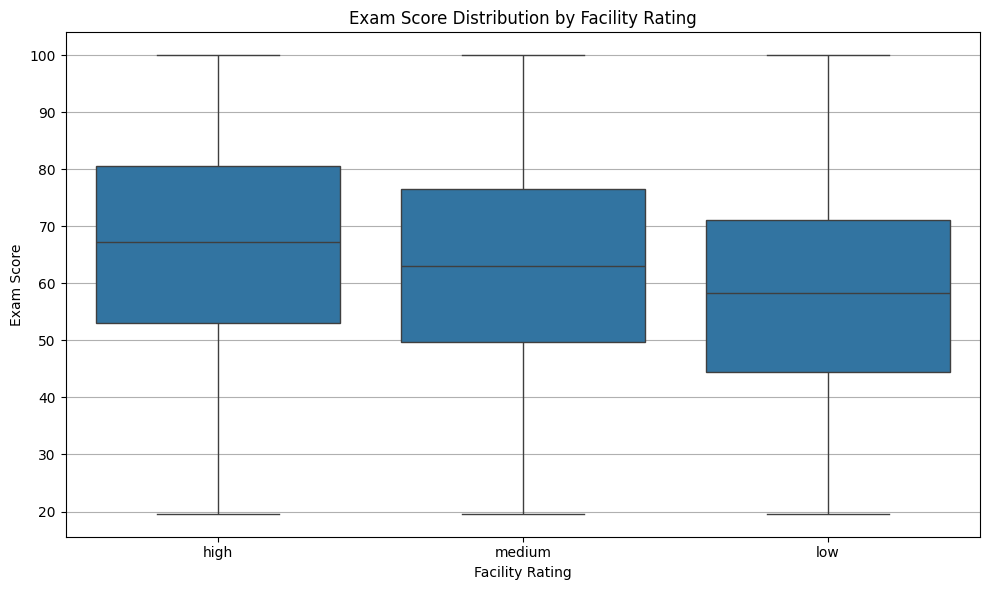

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train['facility_rating'], y=y_train)
plt.title('Exam Score Distribution by Facility Rating')
plt.xlabel('Facility Rating')
plt.ylabel('Exam Score')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

This cell creates a box plot to visualize the distribution of 'exam_score' based on 'sleep_quality'. This helps in understanding the potential impact of sleep quality on exam performance.

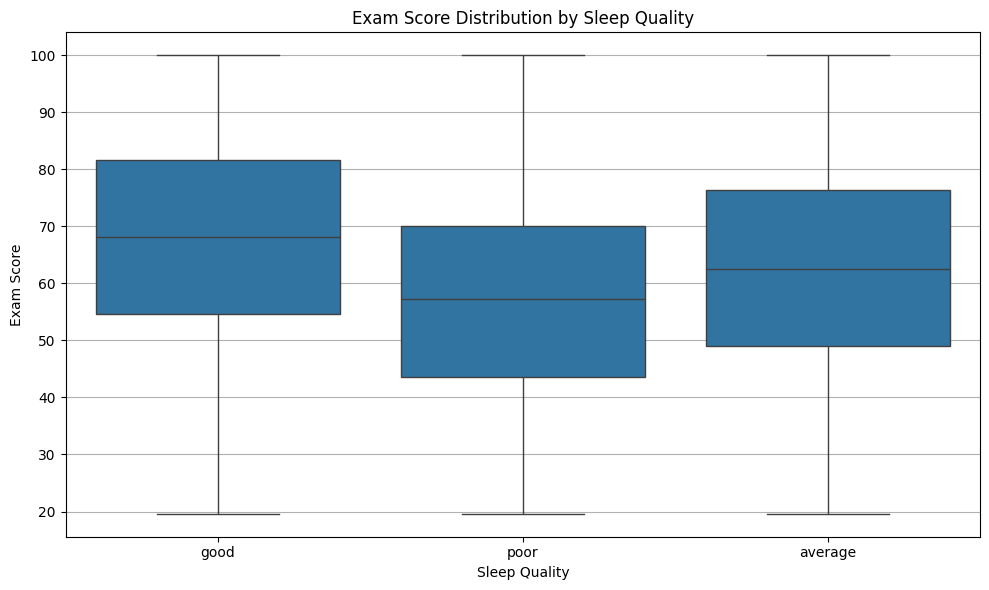

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train['sleep_quality'], y=y_train)
plt.title('Exam Score Distribution by Sleep Quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Exam Score')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

This cell generates a regression plot to visualize the relationship between 'sleep_hours' and 'exam_score'. It includes a scatter plot with semi-transparent points and a purple regression line to indicate the trend

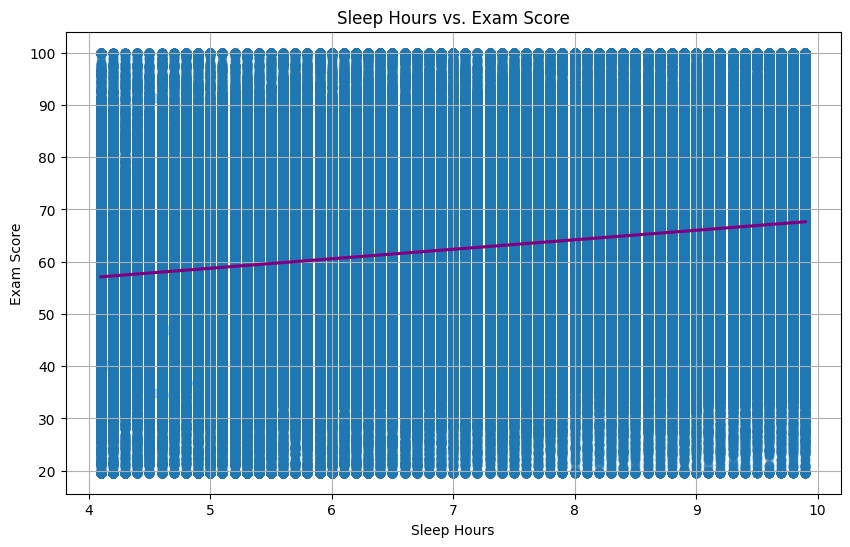

In [25]:
plt.figure(figsize=(10, 6))
sns.regplot(x=X_train['sleep_hours'], y=y_train, scatter_kws={'alpha':0.3}, line_kws={'color':'purple'})
plt.title('Sleep Hours vs. Exam Score')
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

This cell creates a box plot to visualize the distribution of 'exam_score' across different 'exam_difficulty' levels. This helps in understanding how exam performance varies with the perceived difficulty of exams.

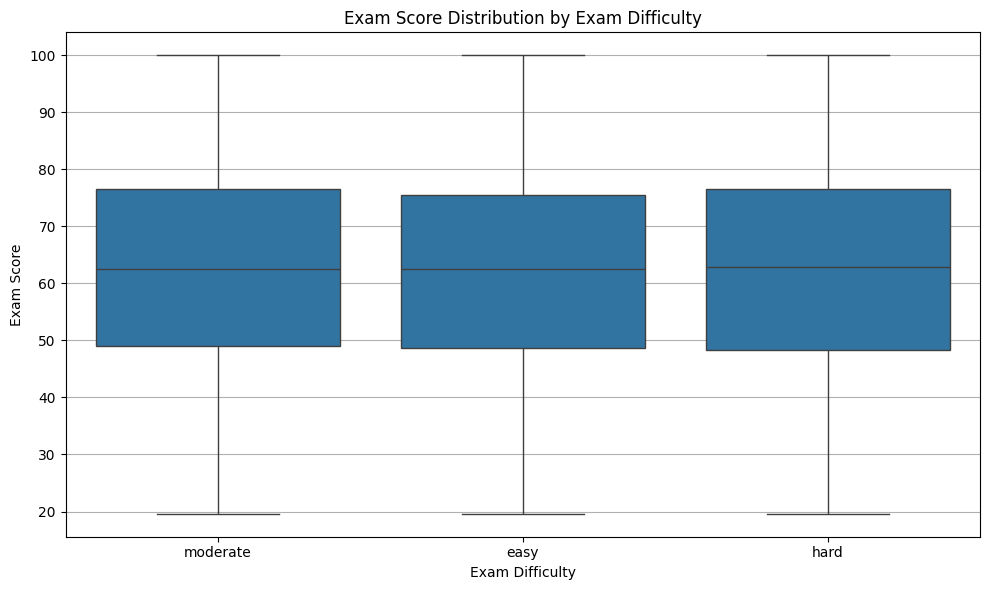

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train['exam_difficulty'], y=y_train)
plt.title('Exam Score Distribution by Exam Difficulty')
plt.xlabel('Exam Difficulty')
plt.ylabel('Exam Score')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

This cell creates a box plot to visualize the distribution of 'exam_score' across different 'study_method' categories. This helps in understanding how various study approaches might influence exam performance.

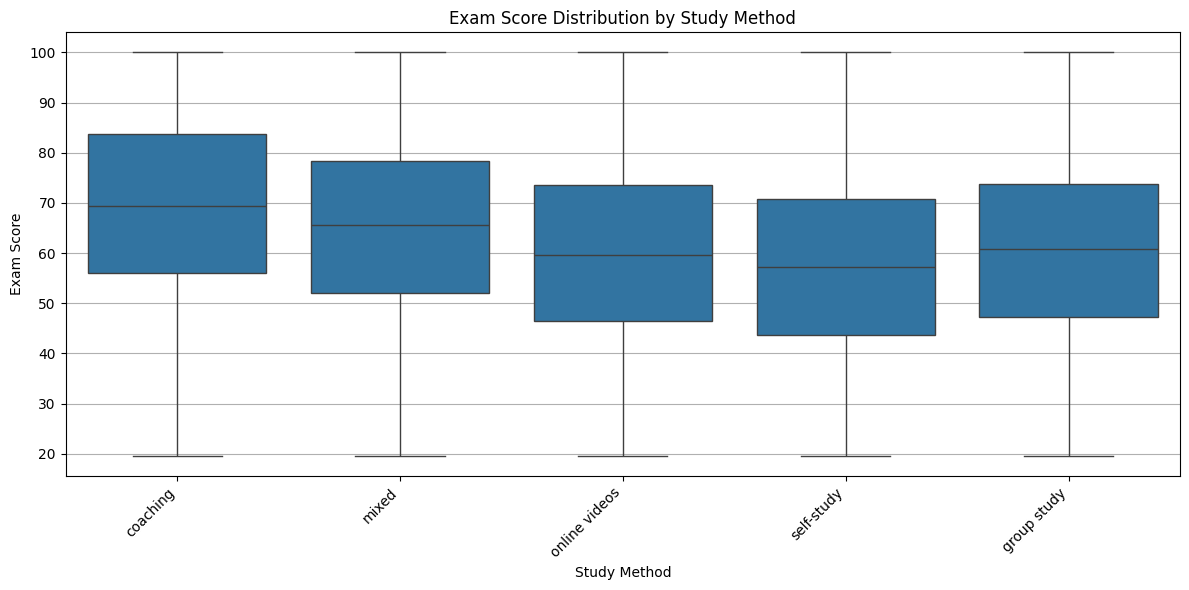

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=X_train['study_method'], y=y_train)
plt.title('Exam Score Distribution by Study Method')
plt.xlabel('Study Method')
plt.ylabel('Exam Score')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

### Preprocessing with ColumnTransformer

This cell defines a `ColumnTransformer` to preprocess different feature types in a structured and leakage-safe manner.

- **internet_access_transformer**  
  Uses a `FunctionTransformer` to safely encode:
  - `'yes' → 1`
  - `'no' → 0`  
  This ensures consistent encoding during training, cross-validation, and inference without manual post-processing.

- **ordinal_transformer**  
  Applies `OrdinalEncoder` to ordinal categorical features:
  - `exam_difficulty`
  - `facility_rating`
  - `sleep_quality`  
  using predefined category orderings.

- **onehot_transformer**  
  Applies `OneHotEncoder` to nominal categorical features:
  - `study_method`
  - `course`
  - `gender`  
  with `handle_unknown='ignore'` to ensure robustness on unseen categories.

- **numerical_transformer**  
  Applies `StandardScaler` to numerical features:
  - `age`
  - `study_hours`
  - `class_attendance`
  - `sleep_hours`

Any columns not explicitly specified are dropped using `remainder='drop'`.


In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, FunctionTransformer


exam_difficulty_categories = ['easy', 'moderate', 'hard']
facility_rating_categories = ['low', 'medium', 'high']
sleep_quality_categories = ['poor', 'average', 'good']
numerical_features = ['age','study_hours','class_attendance','sleep_hours']

preprocessor = ColumnTransformer(
    transformers=[
        ('internet_access_transformer',
         FunctionTransformer(
             func=lambda x: x.iloc[:, 0].map({'yes': 1, 'no': 0}).values.reshape(-1, 1),
             validate=False
         ),
         ['internet_access']),
        ('ordinal_transformer', OrdinalEncoder(categories=[exam_difficulty_categories, facility_rating_categories, sleep_quality_categories]),
         ordinal_categorical_features),
        ('onehot_transformer', OneHotEncoder(handle_unknown='ignore'), nominal_categorical_features),
        ('numerical_transformer', StandardScaler(), numerical_features)
    ],
    remainder='drop'
)

This cell applies the defined `preprocessor` to the `X_train` DataFrame, transforming the raw features into a standardized and encoded format ready for model training. The `fit_transform` method learns the necessary parameters from the training data and then applies the transformations.

In [29]:
X_train_processed = preprocessor.fit_transform(X_train)

This cell creates a comprehensive list of column names, `processed_column_names_for_df`, which will be used to construct the DataFrame from the preprocessed data. It combines the 'internet_access' column, the encoded ordinal features, the one-hot encoded nominal features, and the numerical features in the correct order.

In [30]:
# Create a list of new column names for the processed data

# Get all feature names after one-hot encoding
onehot_feature_names_full = preprocessor.named_transformers_['onehot_transformer'].get_feature_names_out(nominal_categorical_features)

# Combine all feature names in the correct order for DataFrame creation
# (internet_access comes from the 'passthrough' transformer)
processed_column_names_for_df = [
    'internet_access'
] + [
    f'{col}_encoded' for col in ordinal_categorical_features
] + list(onehot_feature_names_full) + numerical_features

### Feature Engineering on Preprocessed Data (Updated)

This cell defines the `add_features` function, which converts the preprocessed NumPy array into a pandas DataFrame and creates additional interaction features:

- **quality_sleep_hours**  
  Combines sleep duration and sleep quality to capture effective rest.

- **attended_study_hours**  
  Combines study hours with class attendance to reflect productive study time.

The `internet_access` feature is already encoded during preprocessing and therefore does not require manual mapping here.


In [31]:
def add_features(df_array):
  # Convert the processed data back to a DataFrame with all columns using a default RangeIndex
  df = pd.DataFrame(df_array, columns=processed_column_names_for_df)
  # Adjust sleep_quality_encoded to start from 1 instead of 0 for interaction term
  df['quality_sleep_hours'] = df['sleep_hours'] * (df['sleep_quality_encoded'] + 1)
  df['attended_study_hours'] = df['study_hours'] * df['class_attendance']
  return df

### Cross-Validation Pipeline (Leakage-Safe Evaluation)

This cell defines a **scikit-learn Pipeline** that combines preprocessing, feature engineering, and model training into a single workflow.  
The primary purpose of this pipeline is to compute **cross-validation scores correctly**, ensuring that:

- The `ColumnTransformer` is **fit independently within each fold**
- Feature engineering is applied **inside each fold**
- No data leakage occurs during cross-validation

⚠️ **Note:**  
This pipeline is used **only for cross-validation**.  
The final model training, test evaluation, and Kaggle submission logic remain unchanged.


In [32]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

cv_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_engineering', FunctionTransformer(add_features, validate=False)),
    ('model', LinearRegression())
])

This cell applies the `add_features` function to the `X_train_processed` data, creating a new DataFrame `X_train_processed_df` with the engineered features, including the adjusted `quality_sleep_hours`.

In [33]:
X_train_processed_df = add_features(X_train_processed)

This cell displays the first few rows of the `X_train_processed_df` DataFrame, showing the preprocessed features and the newly created interaction features.

In [34]:
X_train_processed_df

,internet_access,exam_difficulty_encoded,facility_rating_encoded,sleep_quality_encoded,study_method_coaching,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study,course_b.com,course_b.sc,course_b.tech,course_ba,course_bba,course_bca,course_diploma,gender_female,gender_male,gender_other,age,study_hours,class_attendance,sleep_hours,quality_sleep_hours,attended_study_hours
0,1.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.085755,0.969475,0.092395,1.448640,4.345919,0.089574
1,1.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.085755,1.575415,-0.728001,0.474297,1.422890,-1.146905
2,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.528168,-0.416136,0.201398,1.162068,1.162068,-0.083809
3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.528168,0.952526,-1.273020,1.620583,3.241165,-1.212584
4,1.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.568723,-1.615304,0.121080,-0.958561,-2.875682,-0.195581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623695,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.200929,-0.475459,1.228328,-0.557361,-0.557361,-0.584019
623696,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.241484,1.227953,0.144028,-1.589018,-3.178036,0.176860
623697,1.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.241484,-1.043263,-0.728001,0.760868,2.282605,0.759497
623698,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.241484,0.973713,0.941476,-0.500046,-0.500046,0.916727


This cell initializes and trains a `LinearRegression` model using the processed training data (`X_train_processed_df`) and the target variable (`y_train`).

In [35]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_processed_df,y_train)

LinearRegression()

This cell performs **k-fold cross-validation** using the full preprocessing + feature engineering + model pipeline.

By passing the raw training data (`X_train`) into the pipeline:
- All preprocessing steps are learned **within each fold**
- Feature engineering is applied consistently
- The reported RMSE accurately reflects real-world generalization performance

The metric used is **Root Mean Squared Error (RMSE)**, which aligns with the Kaggle competition’s evaluation metric.


In [36]:
from sklearn.model_selection import cross_val_score
lin_cvs = cross_val_score(
    cv_pipeline,
    X_train,
    y_train,
    cv=10,
    scoring='neg_root_mean_squared_error'
)
lin_cvs

array([-8.87372797, -8.90302783, -8.87136133, -8.91126463, -8.88033367,
       -8.89390038, -8.91339623, -8.88326432, -8.89961804, -8.92572323])

This cell reports the **mean cross-validation RMSE** along with its **standard deviation** across all folds.

- The mean RMSE represents the average predictive error.
- The standard deviation reflects the stability and robustness of the model across different data splits.

Lower mean RMSE with smaller variance indicates a more reliable model.


In [37]:
print(f'Mean cross-validation rmse ± std is {lin_cvs.mean():.4f} ± {lin_cvs.std():.4f}')

Mean cross-validation rmse ± std is -8.8956 ± 0.0173


This cell applies the same preprocessing steps (using the fitted `preprocessor`) and feature engineering (`add_features` function) to the `X_test` dataset, preparing it for prediction.

In [38]:
X_test_processed = preprocessor.transform(X_test)
X_test_processed_df = add_features(X_test_processed)

This cell displays the first few rows of the `X_test_processed_df` DataFrame, showing the preprocessed test features with the engineered interaction terms.

In [39]:
X_test_processed_df

,internet_access,exam_difficulty_encoded,facility_rating_encoded,sleep_quality_encoded,study_method_coaching,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study,course_b.com,course_b.sc,course_b.tech,course_ba,course_bba,course_bca,course_diploma,gender_female,gender_male,gender_other,age,study_hours,class_attendance,sleep_hours,quality_sleep_hours,attended_study_hours
0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.126310,-0.394949,0.935739,-1.703646,-3.407293,-0.369569
1,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.200929,-0.305965,-1.284494,-0.041532,-0.041532,0.393010
2,1.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.241484,0.189804,-1.691823,-0.213475,-0.640424,-0.321115
3,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.200929,0.079633,0.620202,-0.786618,-0.786618,0.049389
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.200929,-1.140721,1.102113,0.818182,0.818182,-1.257204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.126310,-0.894956,0.448091,1.219383,2.438765,-0.401021
6296,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.683897,-0.543256,0.195661,-1.245132,-3.735396,-0.106294
6297,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.241484,1.643213,1.279961,0.818182,0.818182,2.103248
6298,1.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.683897,0.609301,-0.716527,1.620583,4.861748,-0.436581


This cell uses the trained `LinearRegression` model to make predictions on the processed test data (`X_test_processed_df`).

In [40]:
y_predicted = lin_reg.predict(X_test_processed_df)
y_predicted

array([60.63173184, 47.79696888, 62.04691928, ..., 86.11886484,
       81.25238564, 69.25705811])

This cell calculates the Root Mean Squared Error (RMSE) between the actual test target values (`y_test`) and the model's predictions (`y_predicted`). RMSE is a common metric to evaluate regression models, representing the average magnitude of the errors.

In [41]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test,y_predicted)

8.757443445174317

This cell calculates the Mean Absolute Error (MAE) between the actual test target values (`y_test`) and the model's predictions (`y_predicted`). MAE measures the average magnitude of the errors without considering their direction.

In [42]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_predicted)

6.973866125281724

This cell calculates the R-squared (R2) score between the actual test target values (`y_test`) and the model's predictions (`y_predicted`). The R2 score indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.

In [43]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predicted)

0.781884257695755

This cell loads the `test.csv` file, separates the 'id' column for submission, and then applies the previously fitted `preprocessor` and `add_features` function to the new test data, preparing it for final predictions.

In [44]:
true_test_df = pd.read_csv('test.csv')
true_test_set = true_test_df.drop('id', axis=1)
true_test_set_id = true_test_df['id']
true_test_processed = preprocessor.transform(true_test_set)
true_test_processed_df = add_features(true_test_processed)

This cell displays the first few rows of the `true_test_processed_df` DataFrame, showing the processed features that will be used for final predictions.

In [45]:
true_test_processed_df

,internet_access,exam_difficulty_encoded,facility_rating_encoded,sleep_quality_encoded,study_method_coaching,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study,course_b.com,course_b.sc,course_b.tech,course_ba,course_bba,course_bca,course_diploma,gender_female,gender_male,gender_other,age,study_hours,class_attendance,sleep_hours,quality_sleep_hours,attended_study_hours
0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.528168,1.206767,-0.389516,-1.073189,-1.073189,-0.470055
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.126310,1.105070,-1.548397,1.276697,1.276697,-1.711088
2,1.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.528168,1.100833,1.520916,-0.500046,-1.500139,1.674275
3,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.528168,-0.411898,-0.326409,-0.786618,-1.573235,0.134447
4,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.241484,-0.835633,-1.697560,1.219383,2.438765,1.418537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269995,1.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.200929,-0.615291,0.591517,0.760868,1.521736,-0.363955
269996,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.568723,-1.488184,-1.468079,0.990125,2.970376,2.184771
269997,1.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.643342,1.109308,0.155502,-0.901246,-2.703739,0.172500
269998,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.643342,0.033023,-1.158279,0.932811,0.932811,-0.038249


This cell uses the trained `LinearRegression` model to generate predictions on the fully preprocessed `true_test_processed_df`.

In [46]:
true_test_predicted = lin_reg.predict(true_test_processed_df)
true_test_predicted

array([71.93092904, 69.84693366, 87.23832752, ..., 90.07634837,
       55.61131432, 68.5805284 ])

This cell loads and displays the `sample_submission.csv` file, which provides the required format for submitting predictions.

In [47]:
pd.read_csv('sample_submission.csv')

,id,exam_score
0,630000,0
1,630001,0
2,630002,0
3,630003,0
4,630004,0
...,...,...
269995,899995,0
269996,899996,0
269997,899997,0
269998,899998,0


This cell creates a Pandas DataFrame for the final submission, mapping the original test `id`s to the `true_test_predicted` exam scores. It then saves this DataFrame to a CSV file named `kaggle_test_submission.csv`, formatted for submission to a platform like Kaggle, ensuring `index` is `False` to prevent writing the DataFrame index as a column.

In [48]:
true_test_submission = {'id':true_test_set_id,'exam_score':true_test_predicted}
true_test_submission_df = pd.DataFrame(true_test_submission)
true_test_submission_df.to_csv('kaggle_test_submission.csv',index = False)

This cell uses the `joblib` library to serialize and save the trained `LinearRegression` model (`lin_reg`) to a file named 'Linear_Regression_model.joblib'. Saving the model allows it to be reloaded and used later for predictions without retraining, which is crucial for deployment or further analysis. A confirmation message is printed once the model is successfully saved.

In [49]:
import joblib
joblib.dump(lin_reg,'Linear_Regression_model.joblib')
print('Model saved as Linear_Regression_model successfully')

Model saved as Linear_Regression_model successfully
